# Predicting Financial Distress Using Machine Learning Models

image.png

### Project Objective.
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers and the prize pool is 5,000 (3,000 for first, 1,500 for second and 500 for third).

### Project Outline
* Downloading the Data
* Perform exploratory analysis and visualization on the dataset
* Preprocess and clean the data using the pandas library
* Set up evaluation metrics
* Build models
* Tune hyperparameters of our best performing model
* Make predictions on new input data





In [ ]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

Importing Libraries

In [ ]:
import jovian
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
import opendatasets as od

##To Download the data, We'll use the opendatasets library:

In [ ]:
od.download('https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset')

Skipping, found downloaded files in "./give-me-some-credit-dataset" (use force=True to force download)


In [ ]:
os.listdir('give-me-some-credit-dataset')

['cs-training.csv', 'sampleEntry.csv', 'Data Dictionary.xls', 'cs-test.csv']

In [ ]:
df = pd.read_csv('give-me-some-credit-dataset/cs-training.csv')
test_df = pd.read_csv('give-me-some-credit-dataset/cs-test.csv')
submission = pd.read_csv('give-me-some-credit-dataset/sampleEntry.csv')

### Cleaning and Preparing the data

In [ ]:
df

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0        45                                     2     0.802982         9120.0   
1        40                                     0     0.121876         2600.0   
2        38                                     1     0.085113         3042.0   
3        30                                     0     0.036050         3300.0   
4        49                                     1     0.024926        63588.0   
...     ...                                   ...          ...            ...   
149995   74                                     0     0.225131         2100.0   
149996   44                                     0     0.716562         5584.0   
149997   58                                     0  3870.000000            NaN   
149998   30                                     0     0.000000         5716.0   
149999   64                                     0     0.249908         8158.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                    13                        0   
1                                     4                        0   
2                                     2                        1   
3                                     5                        0   
4                                     7                        0   
...                                 ...                      ...   
149995                                4                        0   
149996                                4                        0   
149997                               18                        0   
149998                                4                        0   
149999                                8                        0   

        NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                                  6                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  1                                     0   
...                              ...                                   ...   
149995                             1                                     0   
149996                             1                                     0   
149997                             1                                     0   
149998                             0                                     0   
149999                             2                                     0   

        NumberOfDependents  
0                      2.0  
1                      1.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
149995                 0.0  
149996                 2.0  
149997                 0.0  
149998                 0.0  
149999                 0.

In [ ]:
print(df.shape)
print(test_df.shape)

(150000, 12)
(101503, 12)


In [ ]:
df.describe()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                              4.192781    2037.818523   
min         0.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.175074   
50%        52.000000                              0.000000       0.366508   
75%        63.000000                              0.000000       0.868254   
max       109.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.202690e+05                    150000.000000   
mean    6.670221e+03                         8.452760   
std     1.438467e+04                         5.145951   
min     0.000000e+00                         0.000000   
25%     3.400000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.249000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [ ]:
test_df.describe()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  101503.000000               0.0                         101503.000000   
mean    50752.000000               NaN                              5.310000   
std     29301.536524               NaN                            196.156039   
min         1.000000               NaN                              0.000000   
25%     25376.500000               NaN                              0.030131   
50%     50752.000000               NaN                              0.152586   
75%     76127.500000               NaN                              0.564225   
max    101503.000000               NaN                          21821.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  101503.000000                         101503.000000  101503.000000   
mean       52.405436                              0.453770     344.475020   
std        14.779756                              4.538487    1632.595231   
min        21.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.173423   
50%        52.000000                              0.000000       0.364260   
75%        63.000000                              0.000000       0.851619   
max       104.000000                             98.000000  268326.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   8.140000e+04                    101503.000000   
mean    6.855036e+03                         8.453514   
std     3.650860e+04                         5.144100   
min     0.000000e+00                         0.000000   
25%     3.408000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.200000e+03                        11.000000   
max     7.727000e+06                        85.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            101503.000000                 101503.000000   
mean                  0.296691                      1.013074   
std                   4.515859                      1.110253   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     37.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         101503.000000        98877.000000  
mean                               0.270317            0.769046  
std                                4.503578            1.136778  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           43.000000

### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

We have missing data in two columns, MonthlyIncome and NumberofDependents.

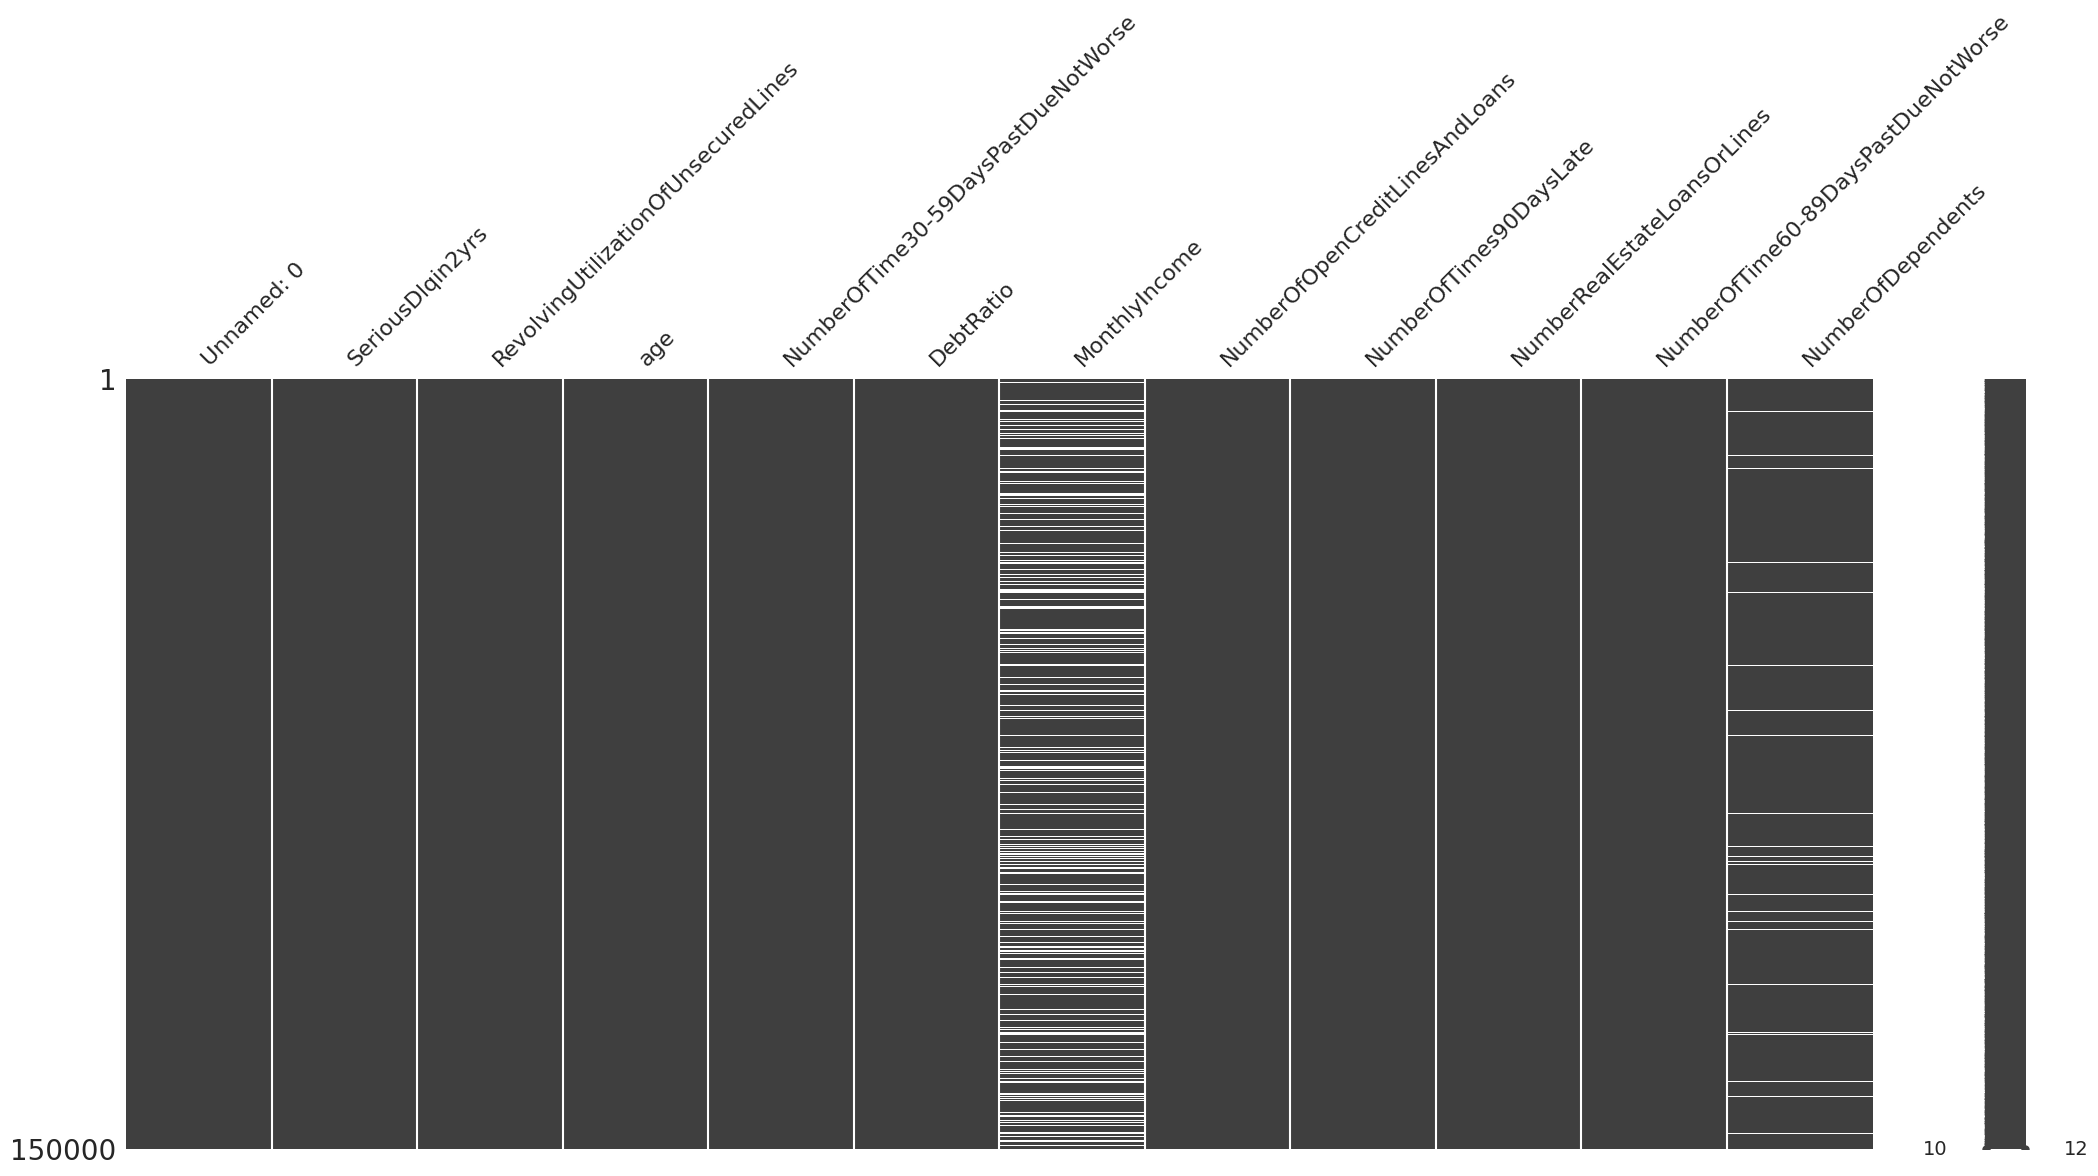

In [ ]:
import missingno as msno
msno.matrix(df);


MonthlyIncome column has more missing data and NumberofDependents has only a few missing values.

In [ ]:
df.age.describe()


count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [ ]:
df.drop(df[df.age < 15].index, inplace=True)
df.drop(df[df.age > 100].index, inplace=True)

In [ ]:
fig = px.histogram(df,
                   x='age',
                   nbins=20,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

It is clear from above visualisation that most of the borrowers are within the 45-50 age range.

In [ ]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=20,
                   color='SeriousDlqin2yrs',
                   title='Age vs Delinquency in 2years')
fig.update_layout(bargap=0.1)
fig.show()

From the graph, we see that people between the age range of 25-65 are more likely to be past due on financial payments.

In [ ]:
fig = px.histogram(df,
                   x='MonthlyIncome',
                   nbins=50,
                   title='Distribution of Monthly Income',
                  log_y=True)
fig.update_layout(bargap=0.1)
fig.show()

Most borrowers are within the income range of 0-99,000.

In [ ]:
fig = px.histogram(df,
                   x='MonthlyIncome',
                   marginal='box',
                   nbins=50,
                   color='SeriousDlqin2yrs',
                   title='MonthlyIncome vs SeriousDlqin2yrs ',
                  log_y=True)
fig.update_layout(bargap=0.1)
fig.show()


From the above grap we can say that the people who is having low income is more on loan repayment

### Pre Processing the data and Feature Engineering.

Training and Validation test sets

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (119988, 12)
val_df.shape : (29998, 12)
test_df.shape : (101503, 12)


Input and Target Columns

. In the current datase we are removing unnamed coloum because it is just a repetition of the index column and there is no use of that coloumn.



In [ ]:
input_cols =list(train_df.columns[2:])
target_col = 'SeriousDlqin2yrs'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Input missing numeric values

Machine learning models can not learn with missing numeric data.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

#To chek the length of the numeric columns
len(numeric_cols)

10

In [ ]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29724
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3921
dtype: int64

In [ ]:
train_inputs['MonthlyIncome'] = train_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
val_inputs['MonthlyIncome'] = val_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
test_inputs['MonthlyIncome'] = test_inputs['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [ ]:
train_inputs['NumberOfDependents'].fillna(0, inplace=True)
val_inputs['NumberOfDependents'].fillna(0, inplace=True)
test_inputs['NumberOfDependents'].fillna(0, inplace=True)

In [ ]:
df.SeriousDlqin2yrs.value_counts() /len(df['SeriousDlqin2yrs'])

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

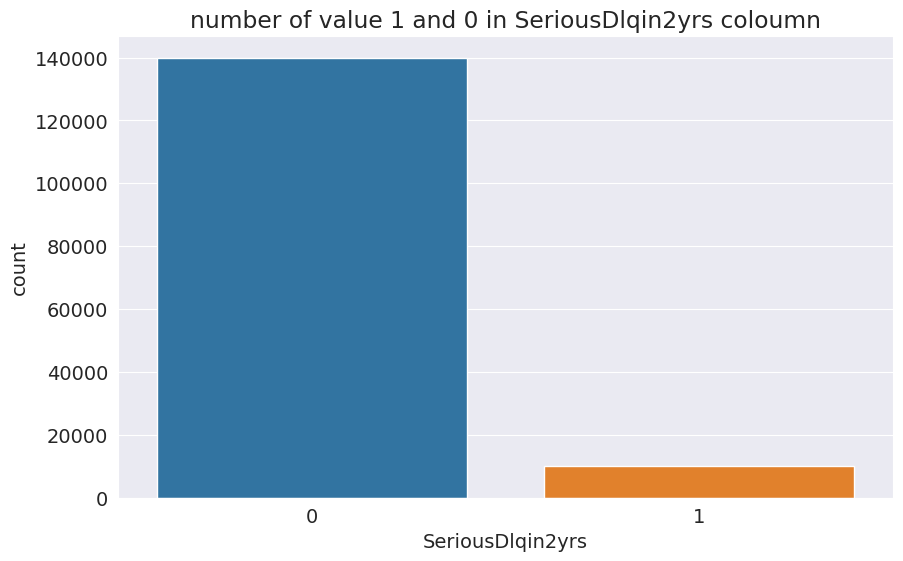

In [ ]:
sns.countplot(data=df, x='SeriousDlqin2yrs').set(title='number of value 1 and 0 in SeriousDlqin2yrs coloumn' );

### Scaling numeric features

In [ ]:
scaler = MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
train_inputs[numeric_cols].describe()

RevolvingUtilizationOfUnsecuredLines            age  \
count                          1.199880e+05  119988.000000   
mean                           1.267917e-04       0.401021   
std                            5.289688e-03       0.189231   
min                            0.000000e+00       0.000000   
25%                            5.925546e-07       0.256410   
50%                            3.047885e-06       0.397436   
75%                            1.108078e-05       0.538462   
max                            1.000000e+00       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                         119988.000000  1.199880e+05  119988.000000   
mean                               0.004261  1.065636e-03       0.002138   
std                                0.042374  6.222495e-03       0.004642   
min                                0.000000  0.000000e+00       0.000000   
25%                                0.000000  5.284588e-07       0.001296   
50%                                0.000000  1.108692e-06       0.001795   
75%                                0.000000  2.622443e-06       0.002459   
max                                1.000000  1.000000e+00       1.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    119988.000000            119988.000000   
mean                          0.145615                 0.002684   
std                           0.088749                 0.042130   
min                           0.000000                 0.000000   
25%                           0.086207                 0.000000   
50%                           0.137931                 0.000000   
75%                           0.189655                 0.000000   
max                           1.000000                 1.000000   

       NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
count                 119988.000000                         119988.000000   
mean                       0.018818                              0.002419   
std                        0.020788                              0.041983   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.018519                              0.000000   
75%                        0.037037                              0.000000   
max                        1.000000                              1.000000   

       NumberOfDependents  
count       119988.000000  
mean             0.036961  
std              0.055383  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.050000  
max              0.650000

In [ ]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

### Evaluating the baseline model


### Logistic regression

Logistic regression is a commonly used technique for solving binary classification problems.

To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, train_targets)

LogisticRegression()

In [ ]:
train_pred_lr = lr.predict(X_train)
val_pred_lr = lr.predict(X_val)

In [ ]:
train_score_lr = f1_score(train_targets, train_pred_lr, average='micro')
val_score_lr = f1_score(val_targets, val_pred_lr, average='micro')

In [ ]:
print(f"Train f1 Score : {train_score_lr}")
print(f"Val f1 Score : {val_score_lr}\n")

Train f1 Score : 0.933076640997433
Val f1 Score : 0.9342956197079806



### Decision tree


A Decision Tree Classifier is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [ ]:
from sklearn.linear_model import Ridge
# Instantiate and fit the model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_dtc = dtc.predict(X_train)
val_pred_dtc = dtc.predict(X_val)

# Calculate the f1 micro score
train_score_dtc = f1_score(train_targets, train_pred_dtc, average='micro')
val_score_dtc = f1_score(val_targets, val_pred_dtc, average='micro')

print(f"Train f1 Score : {train_score_dtc}")
print(f"Val f1 Score : {val_score_dtc}\n")

Train f1 Score : 0.9996666333299997
Val f1 Score : 0.899093272884859



### Random forest

 Random Forest combines the results of several decision trees trained with slightly different parameters. The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out.

We'll use the RandomForestClassifier class from sklearn.ensemble


In [ ]:
# Instantiate and fit the model
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_rfc = rfc.predict(X_train)
val_pred_rfc = rfc.predict(X_val)

# Calculate the f1 micro score
train_score_rfc = f1_score(train_targets, train_pred_rfc, average='micro')
val_score_rfc = f1_score(val_targets, val_pred_rfc, average='micro')

print(f"Train f1 Score : {train_score_rfc}")
print(f"Val f1 Score : {val_score_rfc}\n")

Train f1 Score : 0.9985665233189985
Val f1 Score : 0.9356957130475365



### XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting.

To train a GBM, we can use the XGBRegressor class from the XGBoost library.



In [ ]:
# Instantiate and fit the model
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_xgb = xgb.predict(X_train)
val_pred_xgb = xgb.predict(X_val)

# Calculate the f1 micro score
train_score_xgb = f1_score(train_targets, train_pred_xgb, average='micro')
val_score_xgb = f1_score(val_targets, val_pred_xgb, average='micro')

print(f"Train f1 Score : {train_score_xgb}")
print(f"Val f1 Score : {val_score_xgb}\n")

Train f1 Score : 0.9484365103176985
Val f1 Score : 0.9377625175011668



### Lightgbm

LightGBM, short for light gradient-boosting machine, is a gradient boosting framework that uses tree based learning algorithms.

To train a LGBM, we can use the LGBMClassifier class from the lightgbm library.



In [ ]:
lgb = LGBMClassifier(n_jobs=-1, random_state=42)
lgb.fit(X_train, train_targets)

# Make predictions using the train & Val input columns
train_pred_lgb = lgb.predict(X_train)
val_pred_lgb = lgb.predict(X_val)

# Calculate the f1 micro score
train_score_lgb = f1_score(train_targets, train_pred_lgb, average='micro')
val_score_lgb = f1_score(val_targets, val_pred_lgb, average='micro')

print(f"Train f1 Score : {train_score_lgb}")
print(f"Val f1 Score : {val_score_lgb}\n")

Train f1 Score : 0.9416691669166917
Val f1 Score : 0.9373958263884259



Comparing the different models

In [ ]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost', 'Lightgbm'],
    'Score' : [val_score_dtc, val_score_rfc, val_score_xgb, val_score_lgb]
}).sort_values(by = 'Score', ascending = False)

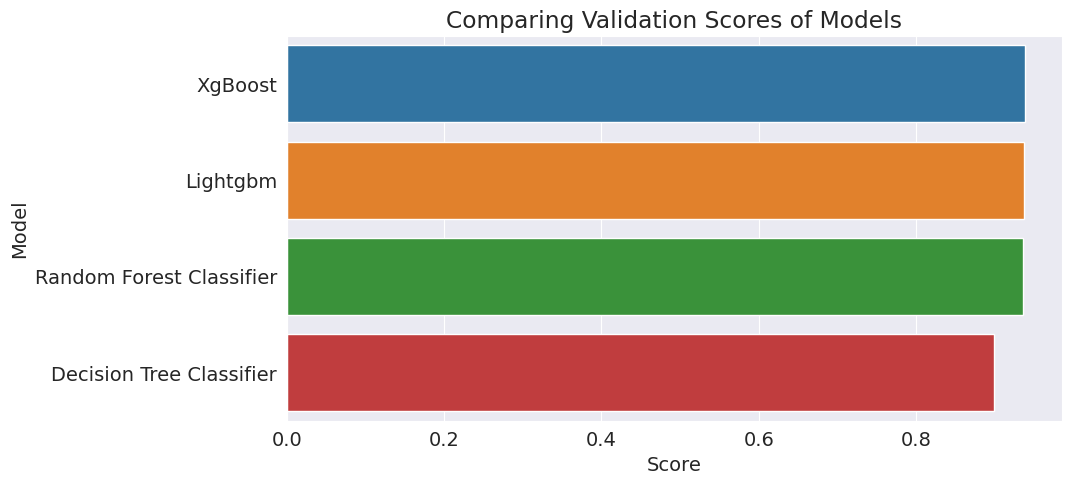

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Comparing Validation Scores of Models')
sns.barplot(data=models, x='Score', y='Model');

We can see that the XGB Classifier is our best performing model.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
}).sort_values('importance', ascending=False)

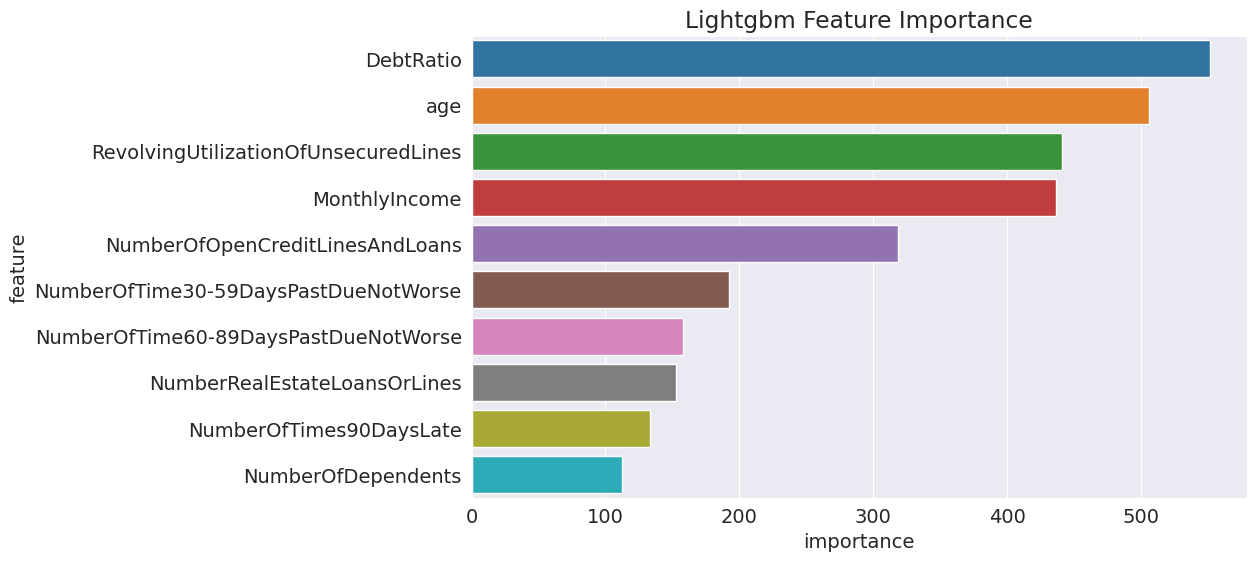

In [ ]:
plt.title('Lightgbm Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Debt Ratio is the most important feature our model used for the prediction

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

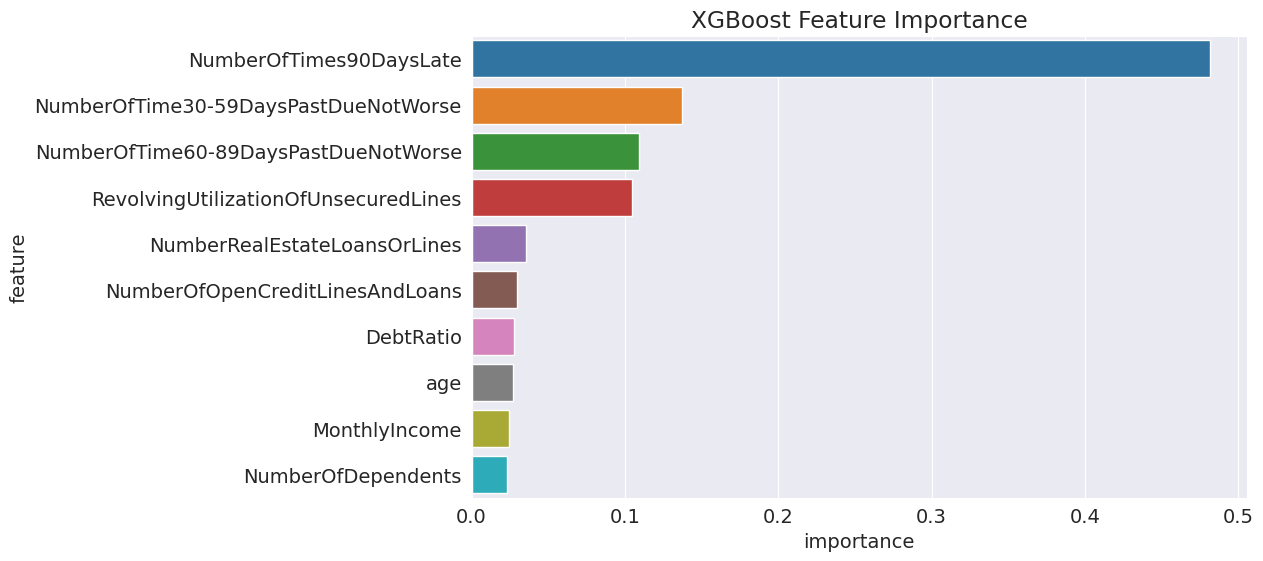

In [ ]:
plt.title('XGBoost Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

### Tune Hyperparmeters

Tuning the XGBoost model as it is seen to be the most successful.

In [ ]:
import matplotlib.pyplot as plt

# First function

def test_params(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    return f1_score(train_targets, train_pred, average='micro'), f1_score(val_targets, val_pred, average ='micro')

# Second function

def test_param_and_plot(param_name, param_values):
    train_f1score, val_f1score = [], []
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_f1score.append(train_score)
        val_f1score.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_f1score, 'b-o')
    plt.plot(param_values, val_f1score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.legend(['Training', 'Validation'])

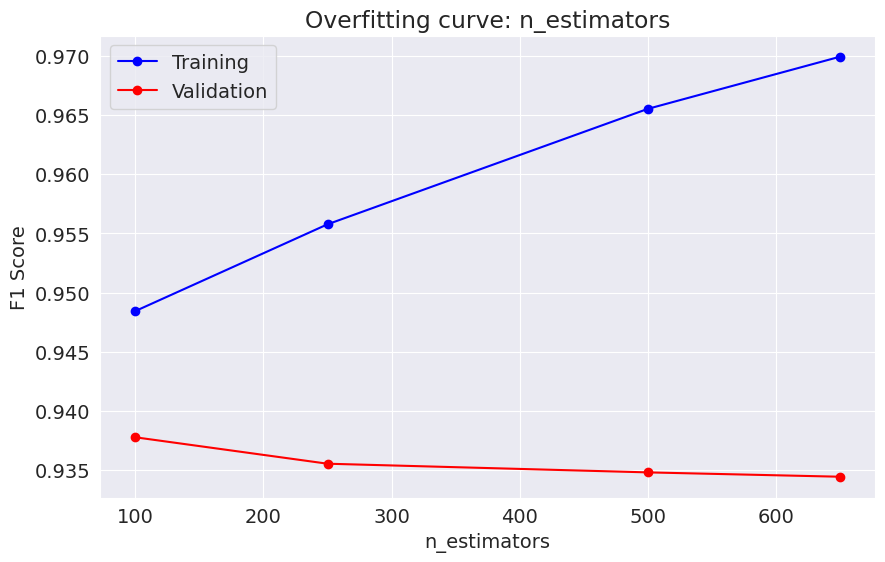

In [ ]:
test_param_and_plot('n_estimators', [100,250,500,650])

In [ ]:
test_params(n_estimators=250)

(0.9557705770577057, 0.935529035269018)

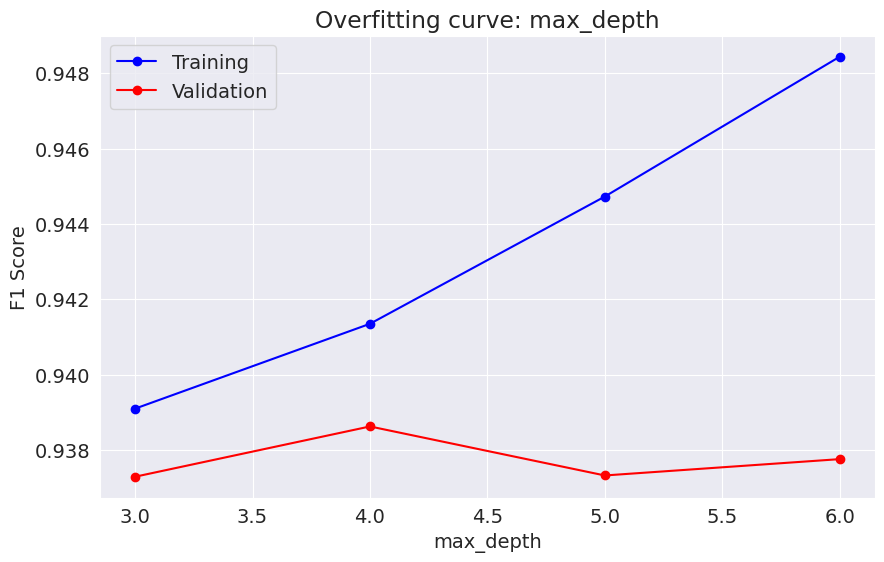

In [ ]:
test_param_and_plot('max_depth', [3, 4, 5, 6])

In [ ]:
test_params(max_dept=3)

[14:24:43] WARNING: ../src/learner.cc:767: 
Parameters: { "max_dept" } are not used.



(0.9484365103176985, 0.9377625175011668)

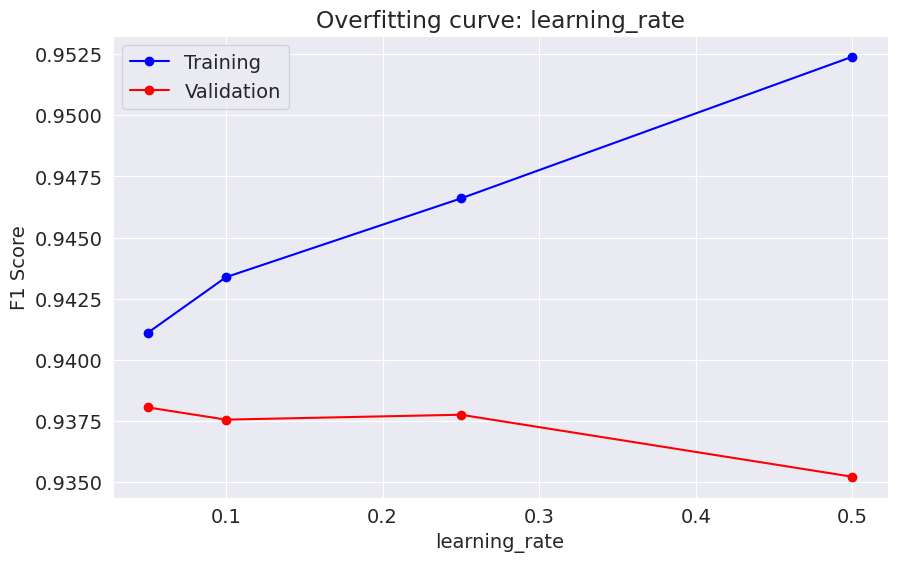

In [ ]:
test_param_and_plot('learning_rate', [0.05, 0.1, 0.25, 0.5])

In [ ]:
test_params(learning_rate =0.25)

(0.9466029936326966, 0.9377625175011668)

In [ ]:
final_model = XGBClassifier(n_estimators=250, learning_rate=0.25, max_depth=5,
                             random_state=42, n_jobs=-1)
final_model.fit(X_train,train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
train_pred = final_model.predict(X_train)
val_pred = final_model.predict(X_val)

train_f1score = f1_score(train_targets, train_pred, average='micro')
val_f1score = f1_score(val_targets, val_pred, average ='micro')

print(f"Train f1 Score : {train_f1score}")
print(f"Val f1 Score : {val_f1score}")

Train f1 Score : 0.9489198919891989
Val f1 Score : 0.9372958197213147


LightGBM

In [ ]:
# First function

def test_params(**params):
    model = LGBMClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    return f1_score(train_targets, train_pred, average='micro'), f1_score(val_targets, val_pred, average ='micro')

In [ ]:
# Second function

def test_param_and_plot(param_name, param_values):
    train_f1score, val_f1score = [], []
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_f1score.append(train_score)
        val_f1score.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_f1score, 'b-o')
    plt.plot(param_values, val_f1score, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.legend(['Training', 'Validation'])

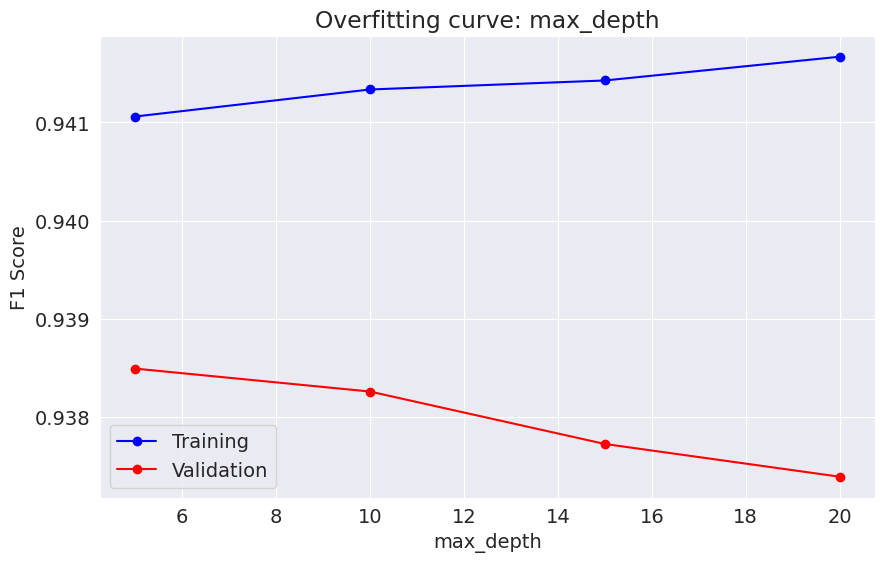

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20])

In [ ]:
test_params(max_depth=10)

(0.9413358002466914, 0.9382625508367226)

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


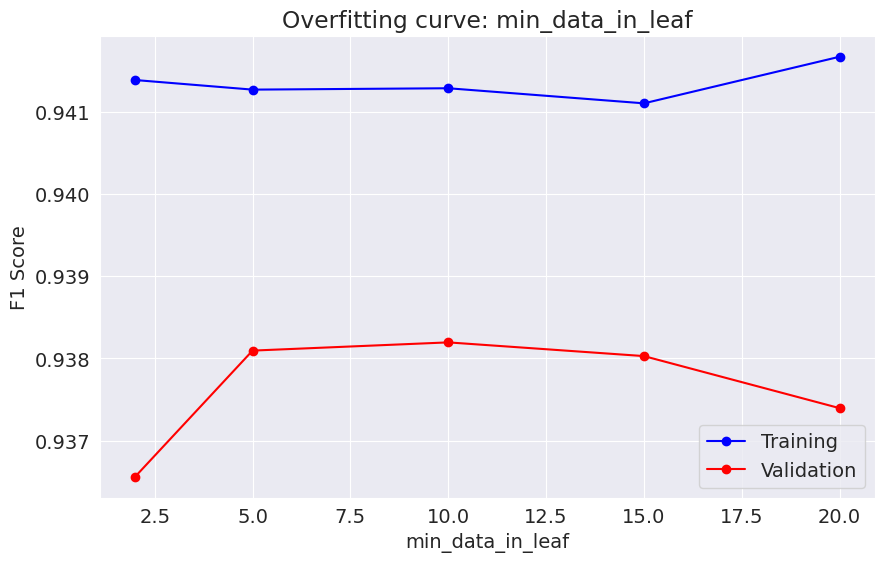

In [ ]:
test_param_and_plot('min_data_in_leaf', [2, 5, 10, 15, 20])

In [ ]:
test_params(min_data_in_leaf=5)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


(0.9412691269126913, 0.9380958730582039)

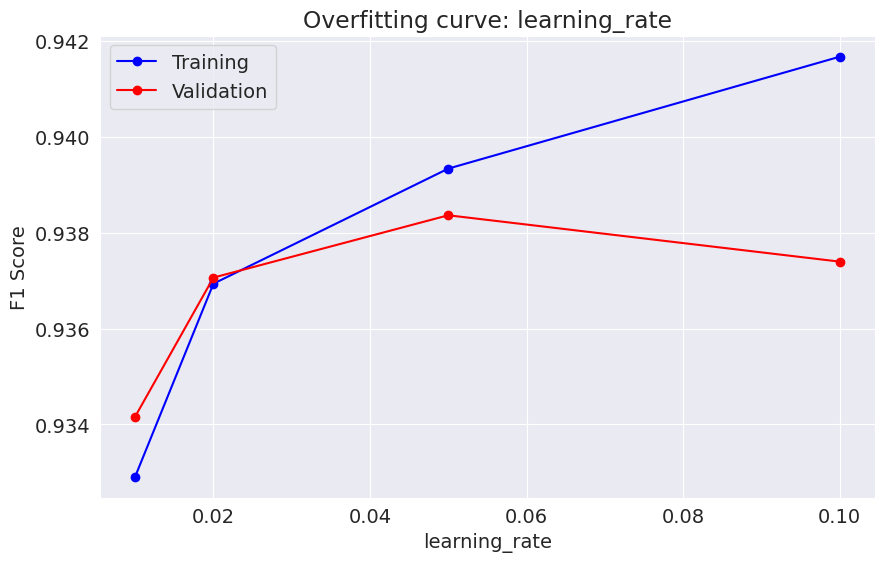

In [ ]:
test_param_and_plot('learning_rate', [0.01, 0.02, 0.05, 0.1])

In [ ]:
test_params(learning_rate=0.05)

(0.9393356002266894, 0.9383625575038336)

In [ ]:
final_model = LGBMClassifier(learning_rate=0.05, max_depth=10, min_data_in_leaf=5,
                             num_leaves=15, bagging_fraction=0.5, bagging_freq=100,
                             feature_fractio=0.6, random_state=42, n_jobs=-1)
final_model.fit(X_train,train_targets)

[LightGBM] [Warning] Unknown parameter: feature_fractio
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


LGBMClassifier(bagging_fraction=0.5, bagging_freq=100, feature_fractio=0.6,
               learning_rate=0.05, max_depth=10, min_data_in_leaf=5,
               num_leaves=15, random_state=42)

In [ ]:
train_pred = final_model.predict(X_train)
val_pred = final_model.predict(X_val)

train_f1score = f1_score(train_targets, train_pred, average='micro')
val_f1score = f1_score(val_targets, val_pred, average ='micro')

print(f"Train f1 Score : {train_f1score}")
print(f"Val f1 Score : {val_f1score}")

Train f1 Score : 0.9382354902156882
Val f1 Score : 0.9381625441696113


Based on the hypertuning LGBM is the best model compare to XGB regressor.We got best score with 93.81% on the validation set

## Summary
* The dataset contains 150,000 rows and 12 columns, while the test dataset contains about 100,000 rows with 12 columns.
* Our data set consists of only numerical columns. Monthly Income column has missing data and so does Number of Dependents.
* The missing values in Monthly Income column were replaced using the median of the distribution
* Missing values in Number of Dependents column were replaced using zero, which is the mode of the distribution
* The age column has minimum and maximum age as 0 and 109 respectively. The age a range was adjusted to 18 - 100 years to fit the acceptable minimum age to assess a loan and pensioners
* Most of the borrowers are within the 45-49 age range and younger people between the age range of 25-65 were found to be more likely to be past due on their financial obligation(s) than older people.
* The dataset was trained using 5 different models. LGBM Classifier gave the best F1 score with  on the validation set.
* We achieved F1 score 0.9381 on validation set using LGBM Classifier


## Future Work
Use optimization procedures like Random search and Grid search to find a vector that results in the best performance of the model
Improved feature engineering should give us a significant boost in performance.
Try other feature engineering techniques to see if that improves our model.

## References

* dataset - https://www.kaggle.com/datasets/brycecf/give-me-some-credit-dataset
* scikitlearn- https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
* W3school - https://www.w3schools.com/
* jovian - https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/gradient-boosting-machines-with-xgboost